In [7]:
#make sure you installed the yfinance,using
#pip install yfinance

import yfinance as yf
import datetime as dt
import pandas as pd
import numpy as np
#from numpy import arange
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

In [46]:
#use google as an example
googl_df = pd.read_csv("GOOGL.csv")
googl_df.set_index("Date", inplace=True)
googl_df.head()
googl_df

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
01/02/2018,53.66,52.65,53.80,52.65,31.77M,1.88%
01/03/2018,54.58,53.70,54.80,53.67,31.32M,1.71%
01/04/2018,54.79,54.85,55.20,54.71,26.05M,0.38%
01/05/2018,55.51,55.17,55.68,55.09,30.25M,1.31%
01/08/2018,55.71,55.55,55.96,55.50,24.64M,0.36%
...,...,...,...,...,...,...
11/18/2022,97.43,98.77,98.90,96.37,28.34M,-0.95%
11/21/2022,95.60,97.29,98.39,95.36,21.50M,-1.88%
11/22/2022,97.05,95.89,97.22,94.09,23.04M,1.52%


<ipython-input-48-a980c8fb6ac9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  googl_df['Vol.'][i]=float(str(googl_df['Vol.'][i])[:-1])*1000000


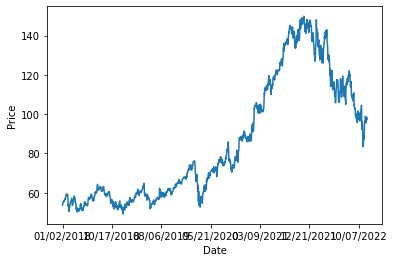

In [48]:
for i in range (1235):
    googl_df['Vol.'][i]=float(str(googl_df['Vol.'][i])[:-1])*1000000
googl_df['Price'].plot()
plt.ylabel("Price")
plt.show()

In [91]:
x = googl_df.iloc[:, 1:5].values
y = googl_df.iloc[:, 0].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,  random_state=0)

In [92]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)
model = RandomForestRegressor(n_estimators=50, random_state=42, min_samples_split=22, min_samples_leaf=10, max_depth=100, bootstrap=True)
model.fit(x_train, y_train)
predict = model.predict(x_test)
print(predict.shape)


(309,)


In [93]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {model.score(x_train, y_train) * 100:.2f}% and Test Score : {model.score(x_test, y_test) * 100:.2f}% using Random Tree Regressor.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 0.7302
Mean Squared Error: 1.0745
Root Mean Squared Error: 1.0366
(R^2) Score: 0.9989
Train Score : 99.95% and Test Score : 99.89% using Random Tree Regressor.
Accuracy: 99.18 %.


In [94]:
predictions = pd.DataFrame({"Predictions": predict}, index=pd.date_range(start=googl_df.index[-1], periods=len(predict), freq="D"))
predictions.to_csv("google_predict.csv")

Buy price and date
    Unnamed: 0  Predictions
75  2023-02-08    51.166066
Sell price and date
     Unnamed: 0  Predictions
151  2023-04-25   147.507189


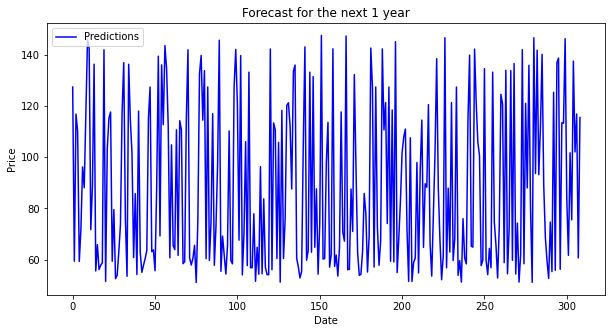

In [95]:
oneyear_df_pred = pd.read_csv("google_predict.csv")

buy_price = min(oneyear_df_pred["Predictions"])
sell_price = max(oneyear_df_pred["Predictions"])
oneyear_buy = oneyear_df_pred.loc[oneyear_df_pred["Predictions"] == buy_price]
oneyear_sell = oneyear_df_pred.loc[oneyear_df_pred["Predictions"] == sell_price]
print("Buy price and date")
print(oneyear_buy)
print("Sell price and date")
print(oneyear_sell)
oneyear_df_pred["Predictions"].plot(figsize=(10, 5), title="Forecast for the next 1 year", color="blue")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()